# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We **Team BM2**, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

We understand that non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Twitter Sentiment Classification Challenge

### Problem Statement

Recommender systems play a crucial role in today's technology-driven world, enabling individuals to make informed choices about the content they engage with on a daily basis. In particular, movie content recommendations rely on intelligent algorithms to help viewers discover great titles from a vast array of options. Companies like Netflix, Amazon Prime, Showmax, and Disney have successfully employed recommendation algorithms to suggest personalized content to their users. The challenge at hand is to construct a recommendation algorithm based on content or collaborative filtering that accurately predicts how a user will rate a movie they have not yet viewed, leveraging their historical preferences.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#one>2. Importing Packages</a>

<a href=#two>3. Setting Up Comet</a>

<a href=#two>4. Loading Data</a>

<a href=#three>5. Exploratory Data Analysis</a>

<a href=#four>6. Feature Extraction</a>

<a href=#five>7. Modeling- Selection, Evaluation, and Fine-Tuning</a>

<a href=#six>8. Model Performance</a>

<a href=#seven>9. Model Explanations</a>

<a href=#two>10. Submission</a>

## 1. Introduction
In the era of digital media consumption, recommender systems have become pivotal for guiding users towards relevant and engaging content. Platforms such as Netflix, Amazon Prime, Showmax, and Disney have mastered the art of providing personalized recommendations, enhancing user satisfaction and driving revenue. Behind these recommendations lies a sophisticated algorithm that analyzes user preferences and historical data to predict their potential interest in unexplored movies.

In this Jupyter notebook, we will tackle the challenge presented by EA, aiming to build a functional recommender system capable of accurately predicting user ratings for unseen movies. By leveraging content-based or collaborative filtering techniques, we will develop an algorithm that harnesses the power of historical user data to generate meaningful recommendations.

The value of constructing an effective recommender system is immense, both economically and socially. A successful solution to this challenge can open doors to increased user engagement, platform affinity, and revenue generation. The evaluation metric for this competition is the Root Mean Square Error (RMSE), a widely used measure in regression analysis and forecasting. By minimizing the RMSE, we can enhance the accuracy and reliability of our recommendation algorithm, improving user satisfaction and driving platform success.

To participate in this competition, submission files should adhere to a specific format. Each submission should include two columns: "Id" and "rating." The "Id" column should consist of a concatenation of the userID and movieID, separated by an underscore (_). The "rating" column should contain the predicted rating for the corresponding user-movie pair.

Let's dive into the challenge and develop an innovative recommendation algorithm that brings users closer to the movies they love.

### Data Overview

The dataset provided for this challenge consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has been widely used by both industry and academic researchers to enhance the performance of recommender systems. In this challenge, we will be working with a special version of the MovieLens dataset that has been enriched with additional data and resampled to ensure fair evaluation.

Source:
The MovieLens dataset is maintained by the GroupLens research group at the University of Minnesota's Department of Computer Science and Engineering. Additional movie content data has been legally scraped from IMDB to enrich the dataset.

Supplied Files:

1. ##### genome_scores.csv: 
This file contains scores that map the strength between movies and tag-related properties. It provides valuable insights into the characteristics and attributes associated with movies.

2. ##### genome_tags.csv: 
User-assigned tags corresponding to the genome-related scores are provided in this file.

3. ##### imdb_data.csv: 
This file includes additional movie metadata that was scraped from IMDB using the links.csv file.

4. ##### links.csv: 
It provides a mapping between the MovieLens ID and associated IMDB and TMDB IDs, allowing cross-referencing of movie data from different sources.

5. ##### sample_submission.csv: 
This file serves as a sample submission format for the hackathon.

6. ##### tags.csv: 
User-assigned tags for the movies within the dataset are provided in this file.

7. ##### test.csv: 
This file contains the test split of the dataset, which includes user and movie IDs but no rating data.

8. ##### train.csv: 
The training split of the dataset is provided in this file. It contains user and movie IDs with associated rating data.

###### Additional Information:
The following information is derived directly from the MovieLens dataset description files:

Ratings Data File Structure (train.csv):
The train.csv file contains all the ratings in the dataset. Each line represents one rating of one movie by one user and follows the format: userId, movieId, rating, timestamp. The lines in the file are ordered first by userId and then, within each user, by movieId. Ratings are provided on a 5-star scale with half-star increments.

###### Tags Data File Structure (tags.csv):
The tags.csv file contains all the user-assigned tags for movies in the dataset. Each line represents one tag applied to one movie by one user and follows the format: userId, movieId, tag, timestamp. The lines in the file are ordered first by userId and then, within each user, by movieId. Tags are user-generated metadata about movies, typically represented by a single word or short phrase.

###### Movies Data File Structure (movies.csv):
The movies.csv file contains information about each movie in the dataset. Each line represents one movie and follows the format: movieId, title, genres. Movie titles are manually entered or imported from https://www.themoviedb.org/ and include the year of release in parentheses. The genres are listed as pipe-separated values.

###### Links Data File Structure (links.csv):
The links.csv file provides identifiers that can be used to link to other sources of movie data. Each line represents one movie and follows the format: movieId, imdbId, tmdbId. The movieId corresponds to the identifier used by https://movielens.org. imdbId corresponds to the identifier used by http://www.imdb.com, and tmdbId corresponds to the identifier used by https://www.themoviedb.org.

###### Tag Genome (genome-scores.csv and genome-tags.csv):
The tag genome represents how strongly movies exhibit specific properties or characteristics encoded by tags, such as being atmospheric, thought-provoking, or realistic. The genome-scores.csv file contains movie-tag relevance data in the format: movieId, tagId, relevance. The genome-tags

## Importing Packages

In [180]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np
import pandas as pd
import cufflinks as cf
import re

import pickle

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

# Libraries for advanced charts
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# Libraries for modelling
from surprise import SVD,SlopeOne,SVDpp,NormalPredictor,KNNBaseline,KNNBasic,KNNWithMeans,KNNWithZScore,NMF,CoClustering
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV, train_test_split

from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

#Libraries for reading data the surprise way
from surprise import BaselineOnly, Dataset, Reader, accuracy

import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


## Setting up Comet

In [181]:
from kaggle_secrets import UserSecretsClient # I use this to store the API key
!pip install --root-user-action=ignore comet_ml
from comet_ml import Experiment # Base class for logging via Comet-ML

# Creating an experiment with api key
experiment = Experiment(
  api_key = "QdncuxaHodsy4odZynP9EgT6p",
  project_name = "Movie_Recommendation",
  workspace="onwudinjo1989"
)

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn.
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/onwudinjo1989/movie-recommendation/8644d7b61d01434b998a5ed7498ef00b
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     os packages                  : 1
COMET INFO:     source_code                  

## Loading Data

In [182]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/edsa-movie-recommendation-predict/sample_submission.csv
/kaggle/input/edsa-movie-recommendation-predict/movies.csv
/kaggle/input/edsa-movie-recommendation-predict/imdb_data.csv
/kaggle/input/edsa-movie-recommendation-predict/genome_tags.csv
/kaggle/input/edsa-movie-recommendation-predict/genome_scores.csv
/kaggle/input/edsa-movie-recommendation-predict/train.csv
/kaggle/input/edsa-movie-recommendation-predict/test.csv
/kaggle/input/edsa-movie-recommendation-predict/tags.csv
/kaggle/input/edsa-movie-recommendation-predict/links.csv


In [183]:
df_sample = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/sample_submission.csv')
df_movies = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/movies.csv')
df_imdb_data = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/imdb_data.csv')
df_genome_tags = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/genome_tags.csv')
df_genome_scores = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/genome_scores.csv')
df_train = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/train.csv')
df_test = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/test.csv')
df_tags = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/tags.csv')
df_links = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/links.csv')

## Pre-processing
Data preprocessing in Machine Learning refers to the technique of preparing,cleaning and organizing the raw data to make it suitable for the building and training of our Machine Learning models.

In [184]:
# View the first five rows of the movies data database
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [185]:
# View the first five rows of the imdb data database
df_imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [186]:
# View the first five rows of the tags database
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [187]:
# View the first five rows of the train database
df_train.head()


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [188]:
# View the first five rows of the links database
df_links.head()


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [189]:
# View the first five rows of the genome tags database
df_genome_tags.head()


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [190]:
# View the first five rows of the genome scores database
df_genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [191]:
# View the first five rows of the test database
df_test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [192]:
# View information about the movie database
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [193]:
# View information about the imdb data database
df_imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [194]:
# View information about the tags database
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


In [195]:
# View information about the imdb data database
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [196]:
# View information about the links database
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [197]:
# View information about the tags database
df_genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [198]:
# View information about the genome scores database
df_genome_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


In [199]:
# View information about the test database
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


In [200]:
# Number of rows and columns in the dataframe
df_movies.shape

(62423, 3)

## Exploratory Data Analysis
EDA is applied to investigate the data and summarize the key insights. It will give us the basic understanding of our data, it's distribution, null values and much more. We will use  graphs or some python functions to further explore the data.
- Replace NAN values

In [201]:
#Checking for null values in the movies dataset.  
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [202]:
#Checking for null values in the imdb data dataset.  
df_imdb_data.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

In [203]:
#Checking for null values in the tags dataset.  
df_tags.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [204]:
#Checking for null values in the train dataset.  
df_train.isnull().sum()


userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [205]:
#Checking for null values in the links dataset.  
df_links.isnull().sum()


movieId      0
imdbId       0
tmdbId     107
dtype: int64

In [206]:
#Checking for null values in the genome tags dataset.  
df_genome_tags.isnull().sum()

tagId    0
tag      0
dtype: int64

In [207]:
#Checking for null values in the genome scores dataset.  
df_genome_scores.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [208]:
#Checking for null values in the test dataset.  
df_test.isnull().sum()

userId     0
movieId    0
dtype: int64

In [209]:
#Checking the number of users in the train dataset
df_train["userId"].nunique()

162541

In [210]:
#Checking the number of movies in the train dataset
df_train.movieId.nunique()

48213

In [211]:
#Printing the shape of the movie dataframe 
print (f'Number of ratings in dataset: {df_train.shape[0]}')

Number of ratings in dataset: 10000038


In [212]:
#Printing the shape of the train dataframe 
print (f'Number of ratings in dataset: {df_train.shape[0]}')

Number of ratings in dataset: 10000038


In [213]:
#
df_train.rating.value_counts()

4.0    2652977
3.0    1959759
5.0    1445230
3.5    1270642
4.5     880516
2.0     656821
2.5     505578
1.0     311213
1.5     159731
0.5     157571
Name: rating, dtype: int64

In [214]:
# Merge movies, imdb_data, and train dataframes
merged_df = pd.merge(df_movies, df_imdb_data, on='movieId')
merged_df = pd.merge(merged_df, df_train, on='movieId')

merged_df.head()

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,158849,5.0,994716786
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,97203,5.0,942683155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,161871,3.0,833104576
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,45117,4.0,1442256969
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,27431,5.0,849667827


In [215]:
#Finding the users that gave the most ratings
def user_rating_count(df, n):
    plt.figure(figsize=(8,6))
    data = df['userId'].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='husl')
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} Users by Number of Ratings', fontsize=14)
    plt.xlabel('User ID')
    plt.ylabel('Number of Ratings')
    print("Combined number of ratings:\t",df['userId'].value_counts().head(n).sum(),
         "\nTotal number of movies:\t\t", df['movieId'].nunique())
    plt.show()

Combined number of ratings:	 38970 
Total number of movies:		 48213


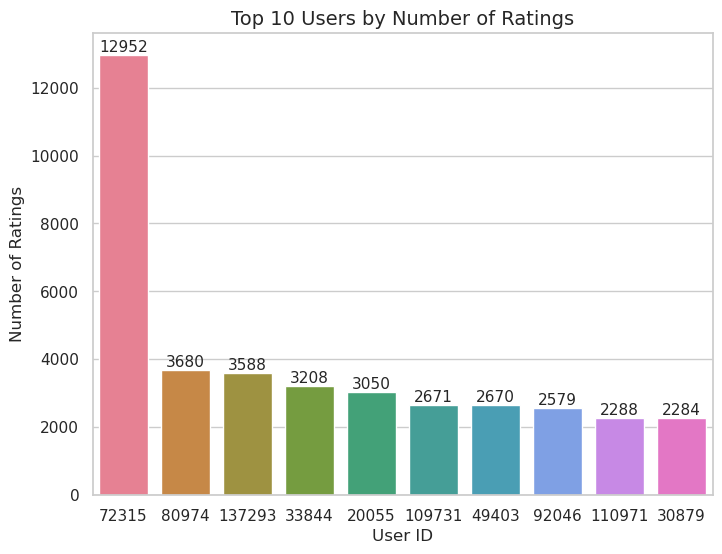

In [216]:
user_rating_count(df_train,10)

We will remove user 72315 to better read the data so that our model can make predictions on data that does not contain outliers

Combined number of ratings:	 28296 
Total number of movies:		 45844


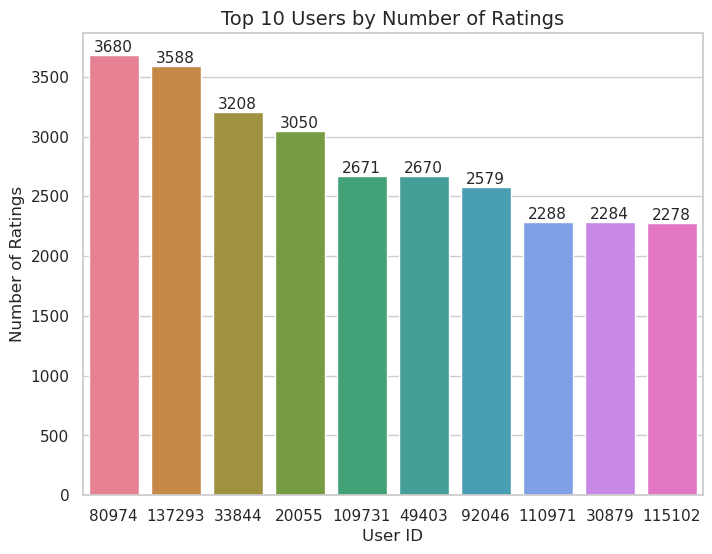

In [217]:
# Removing user 72315 to better read the data
new_df = df_train[df_train['userId']!=72315]
user_rating_count(new_df,10)

Now that we have see the number of ratings by each user, Let us look at the rating that the user gave.

In [218]:
#To find the average rating 
def rating_plot(df, column='rating'):
    plt.figure(figsize=(8,6))
    ax = sns.distplot(df[f'{column}'],bins=10, kde=False, hist_kws=dict(alpha=0.6),color="#fb694a")
    mean = df[f'{column}'].mean()
    median = df[f'{column}'].median()
    plt.axvline(x=mean, label = f'mean {round(mean,2)}' , color='#b11218', lw=3, ls = '--')
    plt.axvline(x=median, label = f'median {median}' , color='#fca082', lw=3, ls = '--')
    plt.xlim((0.5,5))
    plt.ylim((0,2500000))
    plt.title(f'Distribution of Ratings', fontsize=14)
    plt.xlabel('Rating')
    plt.ylabel('Frequency of Ratings')
    plt.legend()
    plt.show()
   

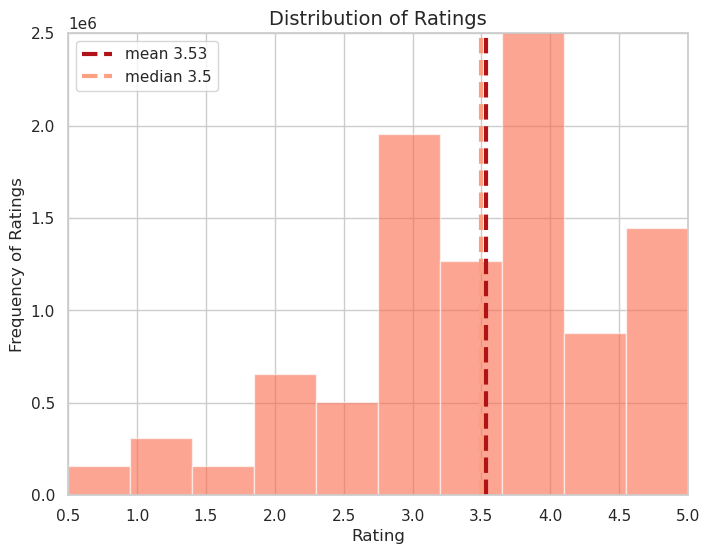

In [219]:
 rating_plot(new_df)

The average user rating is around 3.5 and above, most users rate the movies that they likme and usually do not rate the ones that they do not like. We see that most users gave a rating of 4. 

In [220]:
import datetime

# Assuming you have a timestamp column in your DataFrame called 'timestamp'
merged_df['year'] = pd.to_datetime(merged_df['timestamp'], unit='s').dt.year
merged_df['year'].head()

0    2001
1    1999
2    1996
3    2015
4    1996
Name: year, dtype: int64

In [221]:
# Calculate the count of movies produced per year
movies_per_year = merged_df['year'].value_counts().sort_index()

# Print the count of movies produced per year
print('No. of movies produced per year:\n', movies_per_year)

No. of movies produced per year:
 1995         1
1996    571027
1997    250543
1998    108811
1999    424201
2000    694752
2001    423218
2002    311115
2003    366990
2004    419863
2005    645047
2006    414927
2007    371539
2008    407449
2009    323811
2010    317074
2011    270343
2012    255135
2013    206359
2014    190824
2015    624027
2016    644392
2017    585464
2018    427652
2019    378467
Name: year, dtype: int64


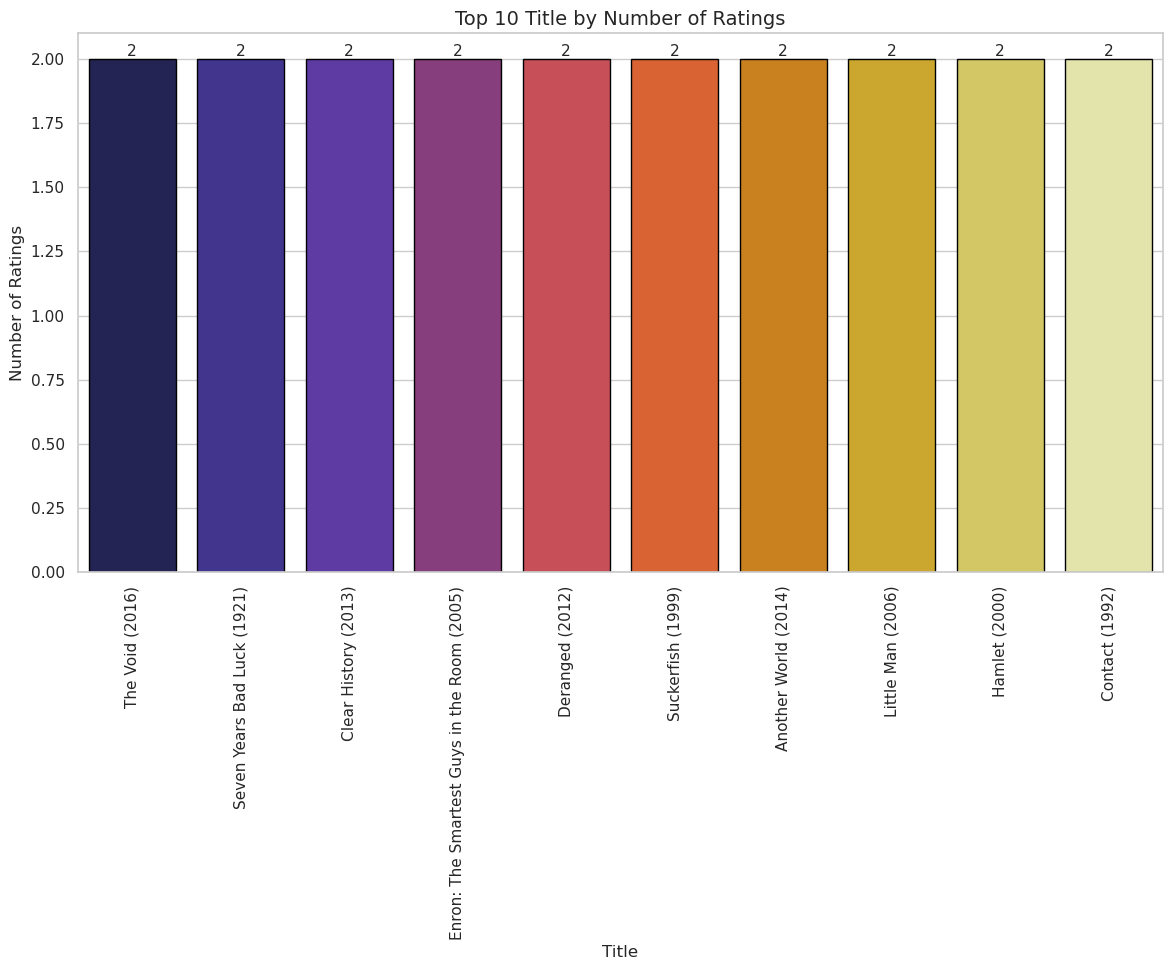

In [223]:
# Get the top ratings of movies

# Define the Function
def top_rating_movies(df,column, n):
    plt.figure(figsize=(14,7))
    data = df[str(column)].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='CMRmap', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} {column.title()} by Number of Ratings', fontsize=14)
    plt.xlabel(column.title())
    plt.ylabel('Number of Ratings')
    plt.xticks(rotation=90)
    plt.show()
top_rating_movies(df_movies,'title',10)